# importing the libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")


**LOADING THE DATASET**

In [5]:

# Load the dataset

df = pd.read_excel(r'C:\Users\USER\Desktop\main_projects\hr attrtion\hr attrition.xlsx')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**SHAPE OF DATA**

In [7]:
df.shape


(1470, 35)

**CHECKING FOR DUPLICATES**

In [8]:
df.duplicated().sum()


0

**CHECKING FOR NULL VALUES**

In [9]:
df.isna().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**DESCRIPTIVE STATISTICS OF THE OBJECT COLUMN**

In [10]:
df.describe(include='object').T


,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


**VALUE COUNT OF ATTRITION COLUMN**

Attrition
No     1233
Yes     237
Name: count, dtype: int64


<Axes: title={'center': 'Attrition Distribution'}, xlabel='Attrition'>

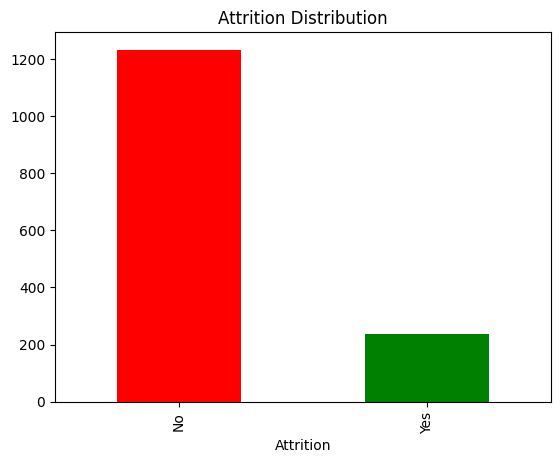

In [11]:
print(df['Attrition'].value_counts())
df['Attrition'].value_counts().plot(kind='bar', color=['red', 'green'], title='Attrition Distribution')


**VALUE COUNT OF THE BUSINESS TRAVEL COLUMN**

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


<Axes: title={'center': 'Business Travel Distribution'}, xlabel='BusinessTravel'>

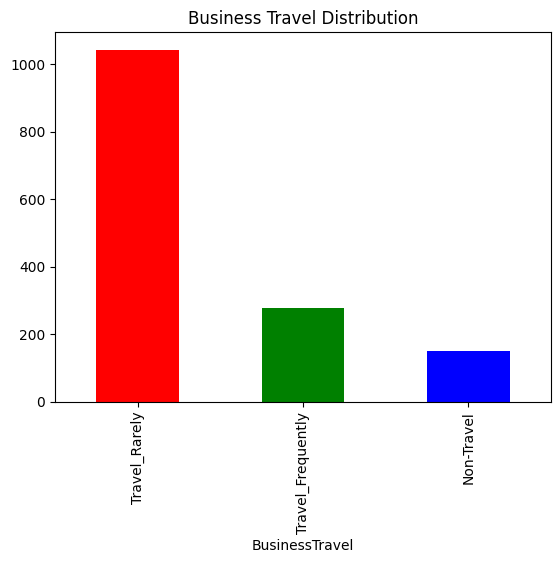

In [12]:
print(df['BusinessTravel'].value_counts())
df['BusinessTravel'].value_counts().plot(kind='bar', color = ['red', 'green', 'blue'], title='Business Travel Distribution')


**VALUE COUNT OF THE DEPARTMENT COLUMN**

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


<Axes: title={'center': 'Department Distribution'}, xlabel='Department'>

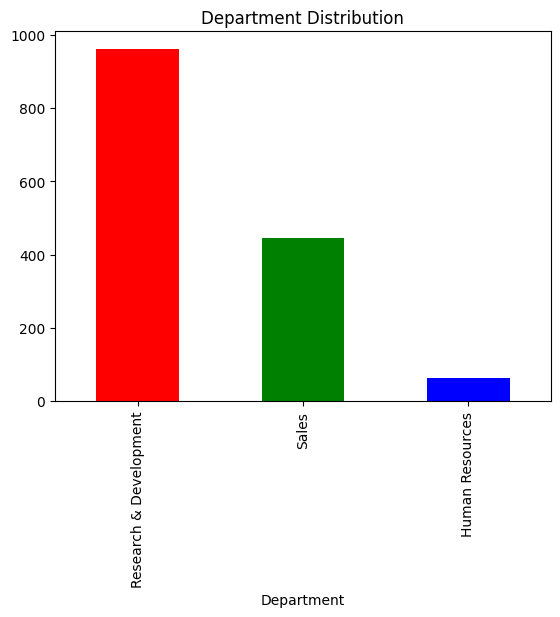

In [13]:
print(df['Department'].value_counts())
df['Department'].value_counts().plot(kind='bar', color = ['red', 'green', 'blue'], title='Department Distribution')


**VALUE COUNT OF THE EDUCATION COLUMN**

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64


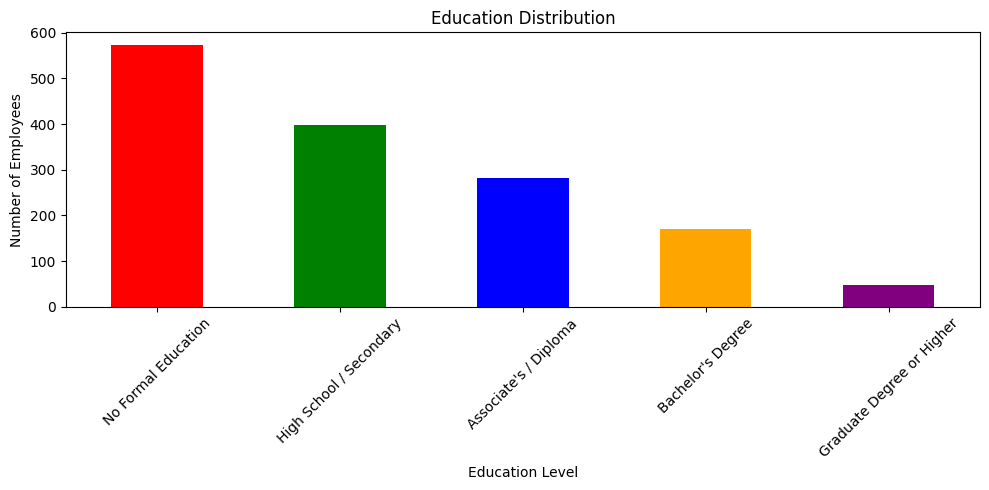

In [14]:
print(df['Education'].value_counts())
df['Education'].value_counts().plot(
    kind='bar',
    title='Education Distribution',
    color=['red', 'green', 'blue', 'orange', 'purple'],
    figsize=(10, 5)
)

# Customize x-axis ticks
plt.xticks(
    ticks=[0, 1, 2, 3, 4],  # positions
    labels=[
        "No Formal Education",
        "High School / Secondary",
        "Associate's / Diploma",
        "Bachelor's Degree",
        "Graduate Degree or Higher"
    ],
    rotation=45
)

plt.xlabel('Education Level')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()


**VALUE COUNT OF EDUCATION FIELD**

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


<Axes: title={'center': 'Education Field Distribution'}, xlabel='EducationField'>

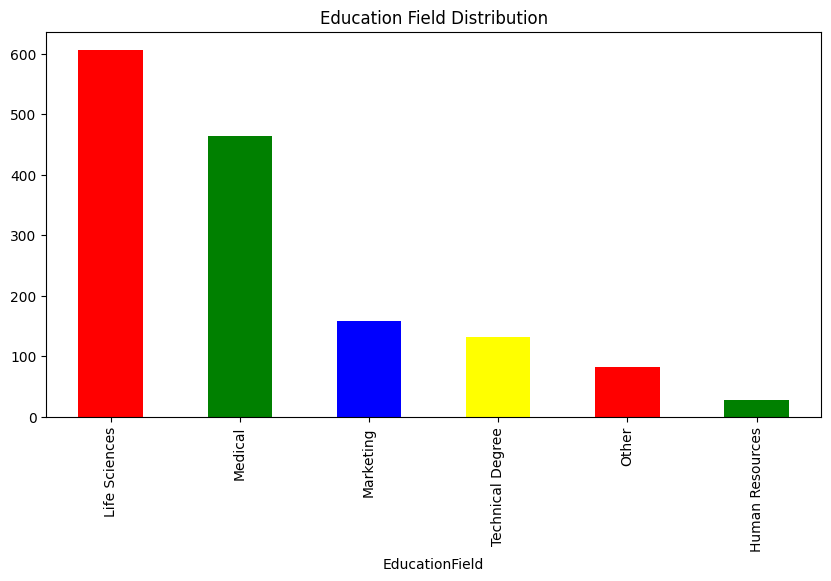

In [ ]:
print(df['EducationField'].value_counts())
df['EducationField'].value_counts().plot(kind='bar', color = ['red', 'green', 'blue', 'yellow'], title='Education Field Distribution',figsize=(10, 5))


**VALUE COUNT OF GENDER**

Gender
Male      882
Female    588
Name: count, dtype: int64


<Axes: title={'center': 'Gender Distribution'}, xlabel='Gender'>

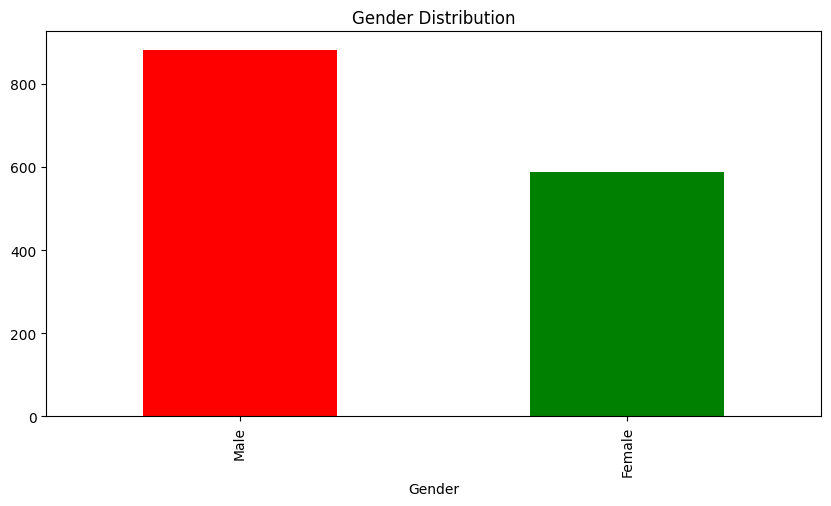

In [ ]:
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot(kind='bar', color = ['red', 'green'],title='Gender Distribution', figsize=(10, 5))


**VALUE COUNT OF JOB ROLE**

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


<Axes: title={'center': 'Job Role Distribution'}, xlabel='JobRole'>

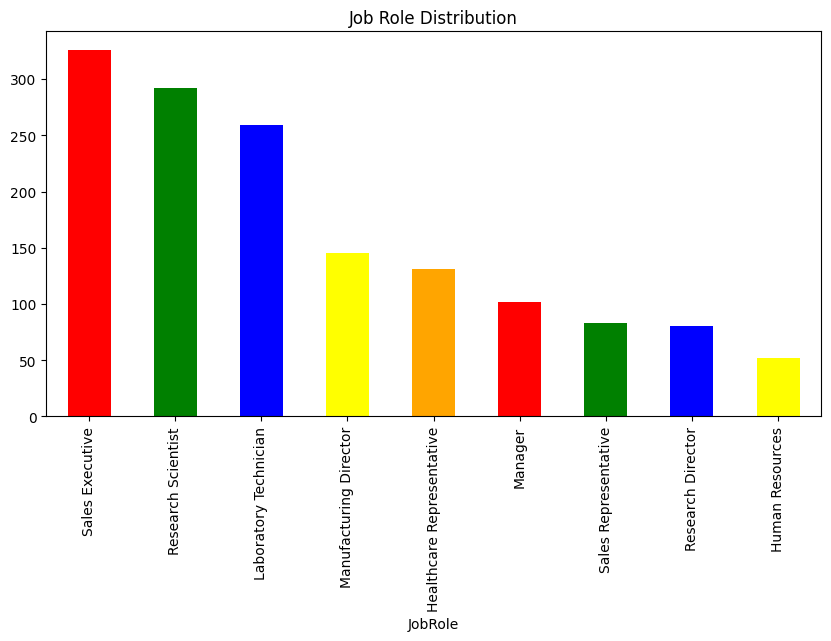

In [ ]:
print(df['JobRole'].value_counts())
df['JobRole'].value_counts().plot(kind='bar', color = ['red', 'green', 'blue', 'yellow', 'orange'], title='Job Role Distribution', figsize=(10, 5))


**VALUE COUNT OF MARITAL STATUS**

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


<Axes: title={'center': 'Marital Status Distribution'}, xlabel='MaritalStatus'>

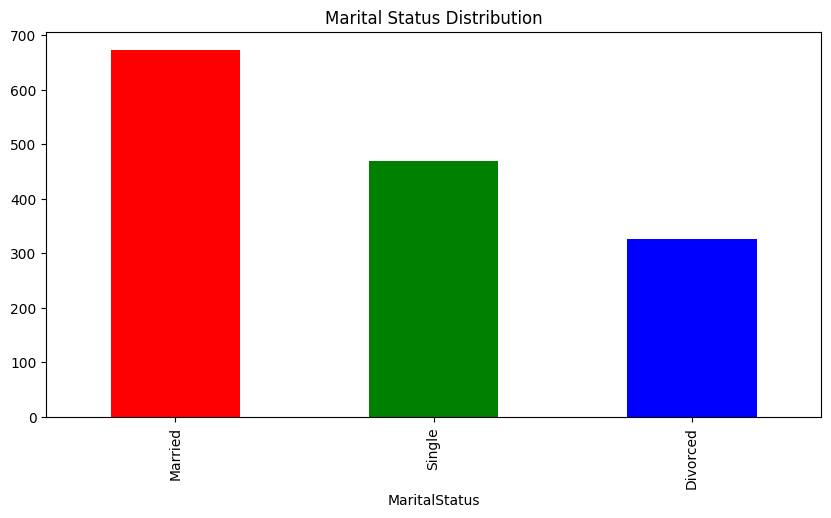

In [ ]:
print(df['MaritalStatus'].value_counts())
df['MaritalStatus'].value_counts().plot(kind='bar', color = ['red', 'green', 'blue'], title='Marital Status Distribution', figsize=(10, 5))


**CORRELATION MATRIX OF COLUMNS**

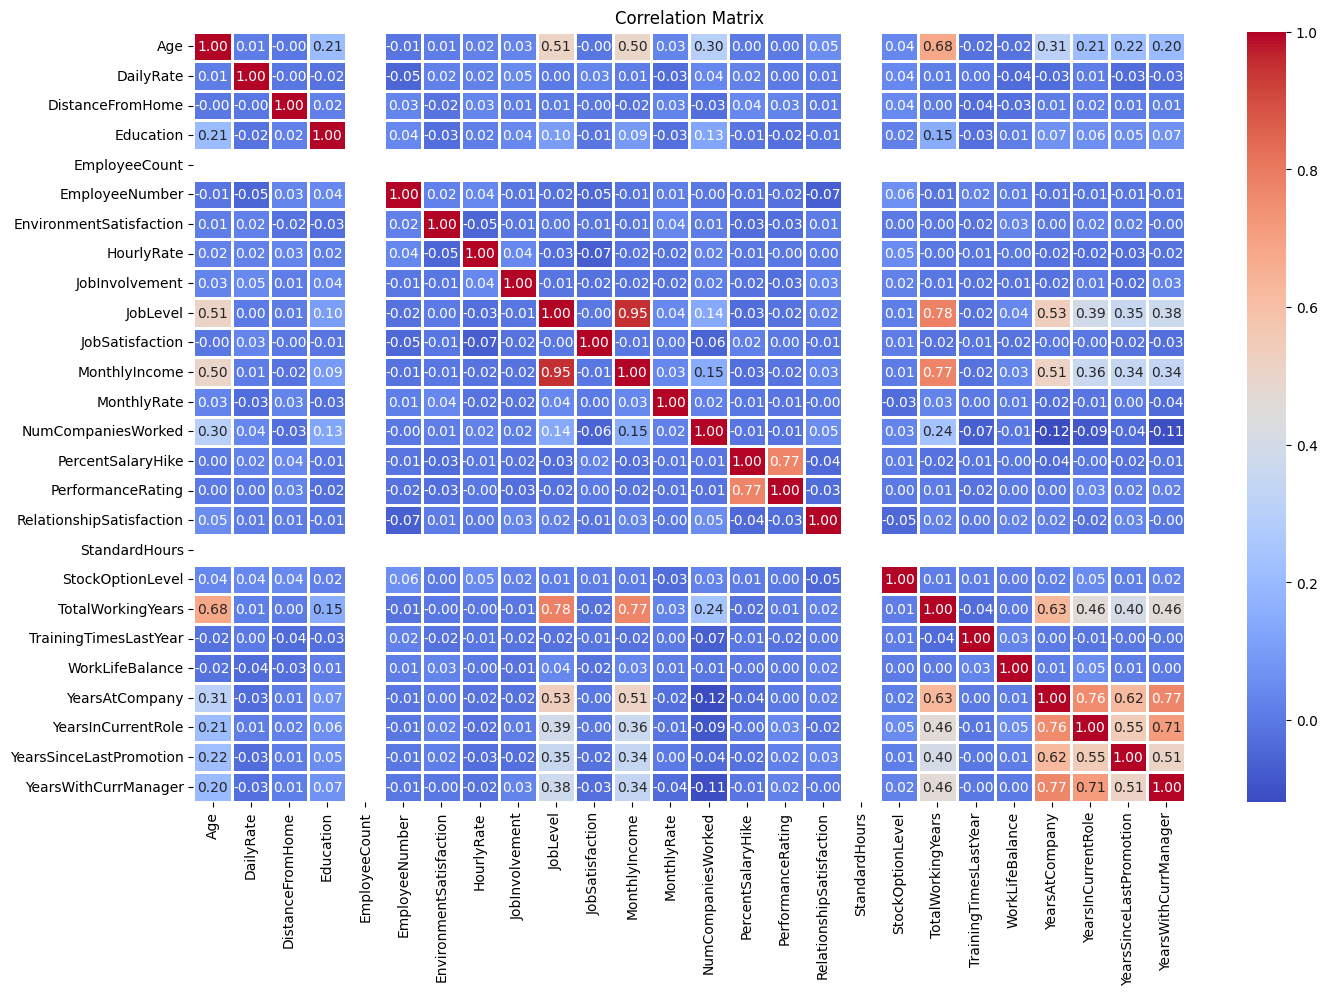

In [ ]:
correlation = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', lw  =1)
plt.title('Correlation Matrix')
plt.show()


**ENCODING CATEGORICAL COLUMNS**

In [17]:
df = df.drop(['EmployeeNumber', 'StandardHours', 'Over18', 'EmployeeCount'], axis=1)   # Dropping columns that are not useful for analysis

# encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
X = df.drop('Attrition', axis=1)    # Features
y = df['Attrition']   # Target variable

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

print("Original class distribution:")
print(X.shape)
print("Resampled class distribution:")
print(X_resampled.shape)


Original class distribution:
(1470, 30)
Resampled class distribution:
(2466, 30)


**SPLITTING AND FITTING THE MODEL USINF RANDOM FOREST CLASSSIFIER**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1972, 30) (494, 30) (1972,) (494,)


**FITTING THE MODEL USING XGBCLASSIFIER**

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       250
           1       0.68      0.67      0.67       244

    accuracy                           0.68       494
   macro avg       0.68      0.68      0.68       494
weighted avg       0.68      0.68      0.68       494



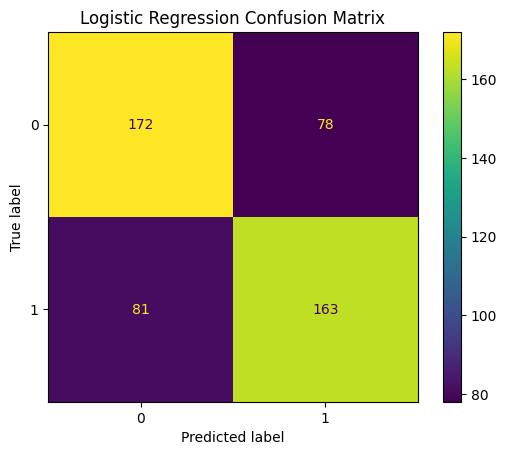


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.88       250
           1       0.83      0.98      0.90       244

    accuracy                           0.89       494
   macro avg       0.90      0.89      0.89       494
weighted avg       0.91      0.89      0.89       494



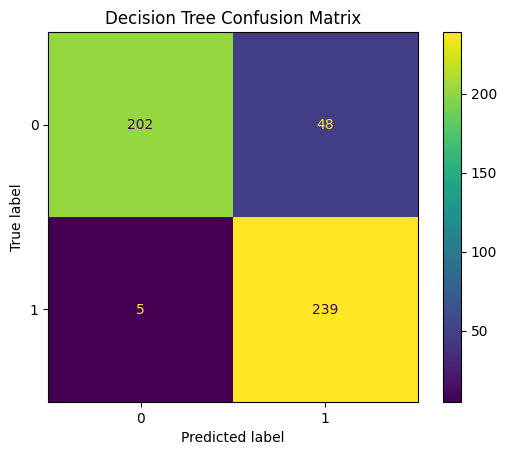


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       250
           1       0.95      0.97      0.96       244

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494



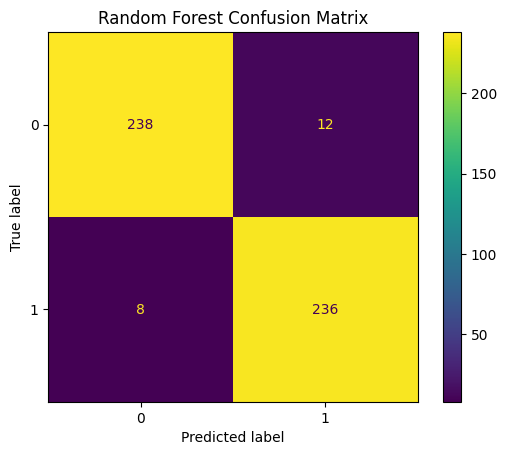

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:54:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       250
           1       0.94      0.98      0.96       244

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494



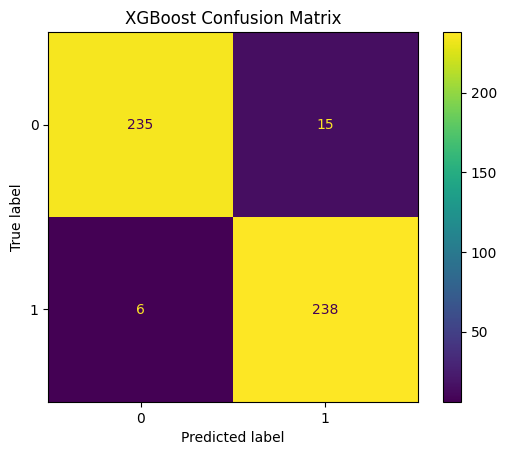

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


XGBoost Train Accuracy: 1.0000
XGBoost Test Accuracy: 0.9575

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       250
           1       0.94      0.98      0.96       244

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494

XGBoost ROC AUC: 0.9890


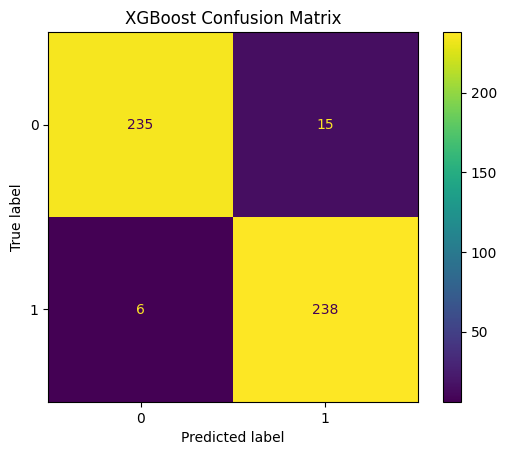

In [30]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
test_accuracy = xgb_model.score(X_test, y_test)
train_accuracy = xgb_model.score(X_train, y_train)
probs = model.predict_proba(X_test)[:,1]
roc = roc_auc_score(y_test, probs)



y_pred = xgb_model.predict(X_test)
print(f'XGBoost Train Accuracy: {train_accuracy:.4f}')
print(f'XGBoost Test Accuracy: {test_accuracy:.4f}')
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print(f"XGBoost ROC AUC: {roc:.4f}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()


**SAVE THE MODEL**

In [31]:
with open('xgb_model.pkl', 'wb') as f:
    import pickle
    pickle.dump(xgb_model, f)


In [32]:
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
